Task-1:

1.1. Load the [combined cycle power plant dataset](https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant) from UCI.

1.2. Split the dataset into training, validation and test sets (70%-15%-15%).

In [ ]:
# importing pandas for data manupulation
import pandas as pd
# importing zipfile to unzip the dataset
import zipfile
# importing requests for requseting from url
import requests
# importing io for file handling
import io
# importing train_test_split for splitting dataset
from sklearn.model_selection import train_test_split
# importing StandardScaler for scaling
from sklearn.preprocessing import StandardScaler
# importing matplotlib for plotting figure
import matplotlib.pyplot as plt
# importing seaborn for the graphs
import seaborn as sns
# importing numpy for numeric computation
import numpy as np
# importing sklearn svm
from sklearn.svm import SVR
# importing mean squared error MSE, r2 score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Task 1.1: Load the dataset
# Download the ZIP file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip"
response = requests.get(url)

# Extracting ZIP into memory
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # The dataset file inside is "Folds5x2_pp.xlsx"
    with z.open("CCPP/Folds5x2_pp.xlsx") as f:
        df = pd.read_excel(f, sheet_name="Sheet1")

# printing the shape of the dataset
print("Dataset Shape:", df.shape)
print(df.head())

# Task 1.2: Split dataset into train, validation, and test (70%-15%-15%)

# First split: Train (70%) and temp (30%)
train_df, temp_df = train_test_split(df, test_size=0.30, random_state=42)

# Second split: Validation (15%) and Test (15%) from temp
val_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=42)

print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)

Dataset Shape: (9568, 5)
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
Train shape: (6697, 5)
Validation shape: (1435, 5)
Test shape: (1436, 5)


Task-2:

2.1. Perform feature scaling such that the features lie in the same range of values.

2.2. Show the correlation between the features of the training set.

Before scaling (first row):
 [  16.69   44.78 1010.41   58.18]
After scaling (first row):
 [-0.39552188 -0.74584603 -0.47467533 -1.03586814]


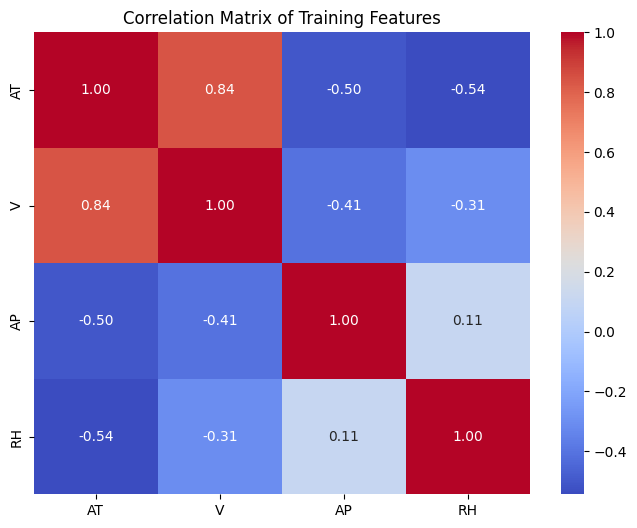

In [ ]:
# Task 2.1: Feature scaling

# Separate features (X) and target (y) for training, validation, test
# it is features of training
X_train = train_df.drop("PE", axis=1)
# it is the output of training data
y_train = train_df["PE"]

# it is features of validation
X_val = val_df.drop("PE", axis=1)
# it is the output of validation data
y_val = val_df["PE"]

# it is features of testing
X_test = test_df.drop("PE", axis=1)
# it is the output of testing data
y_test = test_df["PE"]

# Scale features to have mean=0, std=1
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_valScaled = scaler.transform(X_val)
X_testScaled = scaler.transform(X_test)

# printing before and after scaling the dataset
print("Before scaling (first row):\n", X_train.iloc[0].values)
print("After scaling (first row):\n", X_trainScaled[0])

# Task 2.2: Correlation matrix of training set
plt.figure(figsize=(8,6))
# it is the correlation matrix
corrMatrix = X_train.corr()
# plotting heatmap
sns.heatmap(corrMatrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Training Features")
plt.show()

Task-3:

3.1. Fit an SVM with linear kernel on the training set using sklearn’s SVR.

3.2. Tune the hyperparameters C and ε on the validation set using grid search (Take range of values of C and ε as provided below).

C = 0.01, 0.1, 1, 10, 100; ε = 0.001, 0.01, 0.1, 0.5, 1.0

Initial Linear SVR (C=1.0, ε=0.1) - Validation MSE: 21.185442810095477
C=0.01, ε=0.001 --> Validation MSE = 23.2045
C=0.01, ε=0.01 --> Validation MSE = 23.2037
C=0.01, ε=0.1 --> Validation MSE = 23.2234
C=0.01, ε=0.5 --> Validation MSE = 23.2147
C=0.01, ε=1.0 --> Validation MSE = 23.2700
C=0.1, ε=0.001 --> Validation MSE = 21.0709
C=0.1, ε=0.01 --> Validation MSE = 21.0748
C=0.1, ε=0.1 --> Validation MSE = 21.0943
C=0.1, ε=0.5 --> Validation MSE = 21.1280
C=0.1, ε=1.0 --> Validation MSE = 21.0815
C=1, ε=0.001 --> Validation MSE = 21.2076
C=1, ε=0.01 --> Validation MSE = 21.2046
C=1, ε=0.1 --> Validation MSE = 21.1854
C=1, ε=0.5 --> Validation MSE = 21.2034
C=1, ε=1.0 --> Validation MSE = 21.1809
C=10, ε=0.001 --> Validation MSE = 21.2183
C=10, ε=0.01 --> Validation MSE = 21.2220
C=10, ε=0.1 --> Validation MSE = 21.1978
C=10, ε=0.5 --> Validation MSE = 21.2225
C=10, ε=1.0 --> Validation MSE = 21.1914
C=100, ε=0.001 --> Validation MSE = 21.2266
C=100, ε=0.01 --> Validation MSE = 21.2235


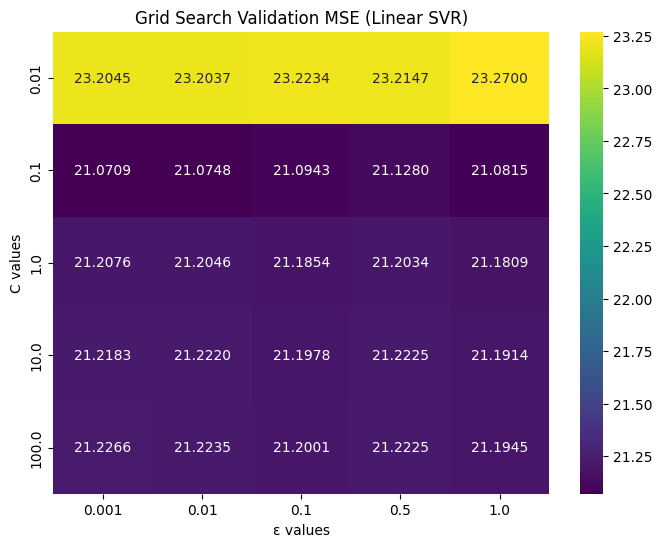


Top 5 Hyperparameter Combinations:


,C,ε,Validation MSE
5,0.1,0.001,21.070918
6,0.1,0.010,21.074810
9,0.1,1.000,21.081506
7,0.1,0.100,21.094324
8,0.1,0.500,21.128046


In [ ]:
# Task 3.1: Fit SVR with linear kernel

# Training initial model
svrLinear = SVR(kernel="linear", C=1.0, epsilon=0.1)
svrLinear.fit(X_trainScaled, y_train)

# Prediction on validation set
y_valPred = svrLinear.predict(X_valScaled)

# Computing validation MSE
mseVal = mean_squared_error(y_val, y_valPred)
print("Initial Linear SVR (C=1.0, ε=0.1) - Validation MSE:", mseVal)

# Task 3.2: Grid Search for hyperparameters C and epsilon
C_values = [0.01, 0.1, 1, 10, 100]
epsilonValues = [0.001, 0.01, 0.1, 0.5, 1.0]

# stoting the results
results = []
# initializing with infinte
bestMse = float("inf")
# initializing with None
bestParams = None

# looping thorough each C values
for C in C_values:
    # looping through each epsilon value
    for eps in epsilonValues:
        # SVR training
        model = SVR(kernel="linear", C=C, epsilon=eps)
        model.fit(X_trainScaled, y_train)
        # validation prediction
        y_valPred = model.predict(X_valScaled)
        # getting MSE of value original and predicted
        mse = mean_squared_error(y_val, y_valPred)

        # storing the results
        results.append((C, eps, mse))
        # for each C and epsilon priinting the MSE
        print(f"C={C}, ε={eps} --> Validation MSE = {mse:.4f}")

        # findinf the best MSE
        if mse < bestMse:
            bestMse = mse
            bestParams = (C, eps)

# printing the best hyperparmeter
print("\nBest Hyperparameters:")
print("C =", bestParams[0], ", ε =", bestParams[1])
# printing the best MSE
print("Best Validation MSE:", bestMse)

dfResults = pd.DataFrame(results, columns=["C", "ε", "Validation MSE"])

# Pivot for heatmap
pivot = dfResults.pivot(index="C", columns="ε", values="Validation MSE")

# Heatmap of results
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap="viridis", fmt=".4f")
plt.title("Grid Search Validation MSE (Linear SVR)")
plt.ylabel("C values")
plt.xlabel("ε values")
plt.show()

# Show top 5 results in table
print("\nTop 5 Hyperparameter Combinations:")
display(dfResults.sort_values("Validation MSE").head())

Task-4:

4.1. Evaluate the linear SVM regressor using the best value of C and ε you obtained. Report the performance in terms of MSE and R^2 score.

4.2. Show a scatter plot of the predictions of the linear SVR model vs. the ground truth target values.

Final Linear SVR Evaluation on Test Set
Best C: 0.1 , Best ε: 0.001
Test MSE: 21.790518539134048
Test R² Score: 0.9244082467622002


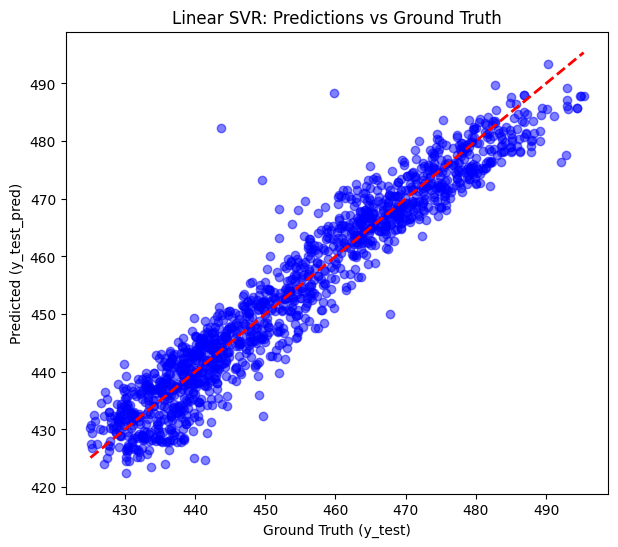

In [ ]:
# 4.1 Train the final model with best params
best_C, best_eps = bestParams
# training the final model
finalModel = SVR(kernel="linear", C=best_C, epsilon=best_eps)
finalModel.fit(X_trainScaled, y_train)

# Predictions on test set
y_testPred = finalModel.predict(X_testScaled)

# Evaluating performance
mseTest = mean_squared_error(y_test, y_testPred)
r2_test = r2_score(y_test, y_testPred)

# printing the results
print("Final Linear SVR Evaluation on Test Set")
print("Best C:", best_C, ", Best ε:", best_eps)
print("Test MSE:", mseTest)
print("Test R² Score:", r2_test)

# 4.2 Scatter plot: predictions vs ground truth
plt.figure(figsize=(7,6))
# plotting the scatter plot
plt.scatter(y_test, y_testPred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", lw=2)  # Perfect prediction line
# xlabel
plt.xlabel("Ground Truth (y_test)")
# ylabel
plt.ylabel("Predicted (y_test_pred)")
# title
plt.title("Linear SVR: Predictions vs Ground Truth")
plt.show()


Task-5:

5.1. Fit an SVM with RBF kernel on the training set using sklearn’s SVR.

5.2. Tune the hyperparameters C, γ and ε on the validation set using grid search (Take range of values of C, γ and ε as provided below).

C = 0.1, 1, 10, 100, 1000; γ = 0.001, 0.01, 0.1, 1, 10; ε = 0.01, 0.1, 0.5, 1.0

Initial RBF SVR (C=1.0, γ=0.1, ε=0.1) - Validation MSE: 16.874709272068404
C=0.1, γ=0.001, ε=0.01 --> Validation MSE = 226.1587
C=0.1, γ=0.001, ε=0.1 --> Validation MSE = 226.0521
C=0.1, γ=0.001, ε=0.5 --> Validation MSE = 226.3104
C=0.1, γ=0.001, ε=1.0 --> Validation MSE = 226.1905
C=0.1, γ=0.01, ε=0.01 --> Validation MSE = 44.0338
C=0.1, γ=0.01, ε=0.1 --> Validation MSE = 44.0285
C=0.1, γ=0.01, ε=0.5 --> Validation MSE = 43.8309
C=0.1, γ=0.01, ε=1.0 --> Validation MSE = 44.0638
C=0.1, γ=0.1, ε=0.01 --> Validation MSE = 22.6866
C=0.1, γ=0.1, ε=0.1 --> Validation MSE = 22.6873
C=0.1, γ=0.1, ε=0.5 --> Validation MSE = 22.7390
C=0.1, γ=0.1, ε=1.0 --> Validation MSE = 22.7174
C=0.1, γ=1, ε=0.01 --> Validation MSE = 43.7029
C=0.1, γ=1, ε=0.1 --> Validation MSE = 43.6351
C=0.1, γ=1, ε=0.5 --> Validation MSE = 43.7789
C=0.1, γ=1, ε=1.0 --> Validation MSE = 44.0294
C=0.1, γ=10, ε=0.01 --> Validation MSE = 255.3005
C=0.1, γ=10, ε=0.1 --> Validation MSE = 255.2550
C=0.1, γ=10, ε=0.5 --> Validat

,C,γ,ε,Validation MSE
75,100.0,1.0,1.0,13.362414
95,1000.0,1.0,1.0,13.476836
74,100.0,1.0,0.5,13.492734
94,1000.0,1.0,0.5,13.503325
73,100.0,1.0,0.1,13.557290


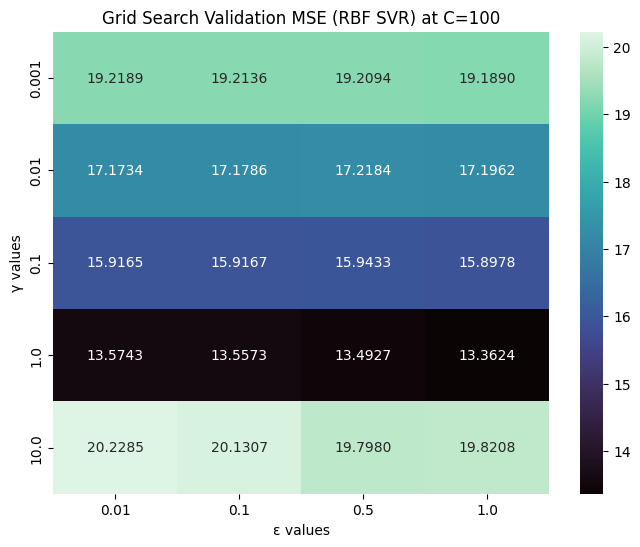

In [ ]:
# Task 5.1: Fit SVR with RBF kernel (baseline)
svrRbf = SVR(kernel="rbf", C=1.0, gamma=0.1, epsilon=0.1)
svrRbf.fit(X_trainScaled, y_train)

# Predict on validation set
y_valPredRbf = svrRbf.predict(X_valScaled)

# Compute validation MSE
mseValRbf = mean_squared_error(y_val, y_valPredRbf)
print("Initial RBF SVR (C=1.0, γ=0.1, ε=0.1) - Validation MSE:", mseValRbf)

# Task 5.2: Grid Search for C, gamma, epsilon
C_values = [0.1, 1, 10, 100, 1000]
gammaValues = [0.001, 0.01, 0.1, 1, 10]
epsilonValues = [0.01, 0.1, 0.5, 1.0]

# storing the results
resultsRbf = []
# initialize best mse with infinte
bestMseRbf = float("inf")
# initialize best param with None
bestParamsRbf = None

# for each C values
for C in C_values:
    # for each gamma values
    for gamma in gammaValues:
        # for each eplsilon values
        for eps in epsilonValues:
            # model training
            model = SVR(kernel="rbf", C=C, gamma=gamma, epsilon=eps)
            model.fit(X_trainScaled, y_train)
            # preding the validation dataset
            y_valPred = model.predict(X_valScaled)
            # calculating the MSE
            mse = mean_squared_error(y_val, y_valPred)

            # storing the results
            resultsRbf.append((C, gamma, eps, mse))
            # pritng result or each C gamma epsilon
            print(f"C={C}, γ={gamma}, ε={eps} --> Validation MSE = {mse:.4f}")

            # getting the best MSE
            if mse < bestMseRbf:
                bestMseRbf = mse
                bestParamsRbf = (C, gamma, eps)

# printing the hyperparameters
print("\nBest Hyperparameters for RBF SVR:")
print("C =", bestParamsRbf[0], ", γ =", bestParamsRbf[1], ", ε =", bestParamsRbf[2])
# printing validation MSE
print("Best Validation MSE:", bestMseRbf)

dfResultsRbf = pd.DataFrame(resultsRbf, columns=["C", "γ", "ε", "Validation MSE"])
# Show top 5 results
print("\nTop 5 Hyperparameter Combinations:")
display(dfResultsRbf.sort_values("Validation MSE").head())

# Heatmap for one C value (say best_C) across γ–ε
best_C = bestParamsRbf[0]
pivot_rbf = dfResultsRbf[dfResultsRbf["C"] == best_C].pivot(index="γ", columns="ε", values="Validation MSE")

plt.figure(figsize=(8,6))
sns.heatmap(pivot_rbf, annot=True, cmap="mako", fmt=".4f")
plt.title(f"Grid Search Validation MSE (RBF SVR) at C={best_C}")
plt.ylabel("γ values")
plt.xlabel("ε values")
plt.show()

Task-6:

6.1. Evaluate the RBF SVM regressor using the best value of C, γ and ε you obtained. Report the performance in terms of MSE and R^2 score.

6.2. Show a scatter plot of the predictions of the RBF SVR model vs. the ground truth target values.

Final RBF SVR Evaluation on Test Set
Best C: 100 , Best γ: 1 , Best ε: 1.0
Test MSE: 15.584909281210807
Test R² Score: 0.9459356318435918


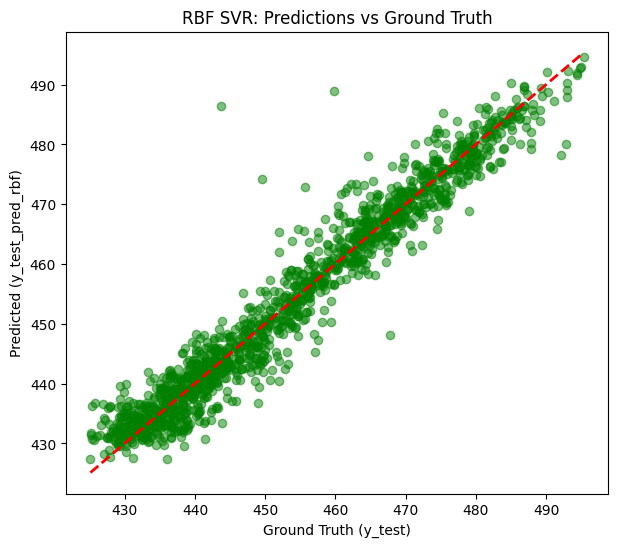

In [ ]:
# 6.1 Train final RBF SVR with best hyperparameters
best_C, best_gamma, best_eps = bestParamsRbf
finalRbfModel = SVR(kernel="rbf", C=best_C, gamma=best_gamma, epsilon=best_eps)
finalRbfModel.fit(X_trainScaled, y_train)

# Predictions on test set
y_testPredRbf = finalRbfModel.predict(X_testScaled)

# Evaluate performance
mseTestRbf = mean_squared_error(y_test, y_testPredRbf)
r2_testRbf = r2_score(y_test, y_testPredRbf)

# printing the resutls
print("Final RBF SVR Evaluation on Test Set")
print("Best C:", best_C, ", Best γ:", best_gamma, ", Best ε:", best_eps)
print("Test MSE:", mseTestRbf)
print("Test R² Score:", r2_testRbf)

# 6.2 Scatter plot: predictions vs ground truth
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_testPredRbf, alpha=0.5, color="green")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", lw=2)  # Perfect prediction line
# xlabel
plt.xlabel("Ground Truth (y_test)")
# ylabel
plt.ylabel("Predicted (y_test_pred_rbf)")
# title
plt.title("RBF SVR: Predictions vs Ground Truth")
plt.show()

In [ ]:
# displaying summary
results_summary = pd.DataFrame([{
    "Best C": best_C,
    "Best γ": best_gamma,
    "Best ε": best_eps,
    "Validation MSE": bestMseRbf,
    "Test MSE": mseTestRbf,
    "Test R²": r2_testRbf
}])

display(results_summary)


,Best C,Best γ,Best ε,Validation MSE,Test MSE,Test R²
0,100,1,1.0,13.362414,15.584909,0.945936
